In [ ]:
# importing the libraries
import pandas as pd # type: ignore
import numpy as np # type: ignore

import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

plt.figure(figsize=(5,5))

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [2]:
# loading the dataset
df = pd.read_csv('data/gurgaon_properties_cleaned(round2).csv')

In [3]:
df.head()

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 50,5.00,215517.0,232.0,Plot area 2(1011.71 sq.m.),6,5,3+,...,NaN,2.0,NaN,1,1,0,1,1,1,0
1,flat,dlf regal gardens,sector 90,1.29,1430.0,9020.0,Super Built up area 1702(158.12 sq.m.)Built Up...,3,3,3,...,1702.0,1540.0,1430.0,1,0,0,0,0,2,174
2,flat,ireo the grand arch,sector 58,2.20,1375.0,16000.0,Carpet area: 1375 (127.74 sq.m.),2,2,1,...,NaN,NaN,1375.0,0,0,0,1,0,1,49
3,flat,ireo victory valley,sector 67,2.95,2436.0,12110.0,Super Built up area 2436(226.31 sq.m.)Built Up...,3,3,3+,...,2436.0,2236.0,2036.0,0,1,0,1,0,1,165
4,flat,puri emerald bay,sector 104,2.23,2250.0,9911.0,Super Built up area 2450(227.61 sq.m.)Carpet a...,3,4,3+,...,2450.0,NaN,2250.0,0,1,0,0,0,1,159


checking each numerical column for the outlier detection

#### `price` column

In [52]:
def data_distribution_checker(col, bins=50):
    plt.figure(figsize=(16,4))

    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=bins)
    plt.title(f'Distribution of {col}')

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.grid()

    plt.show()

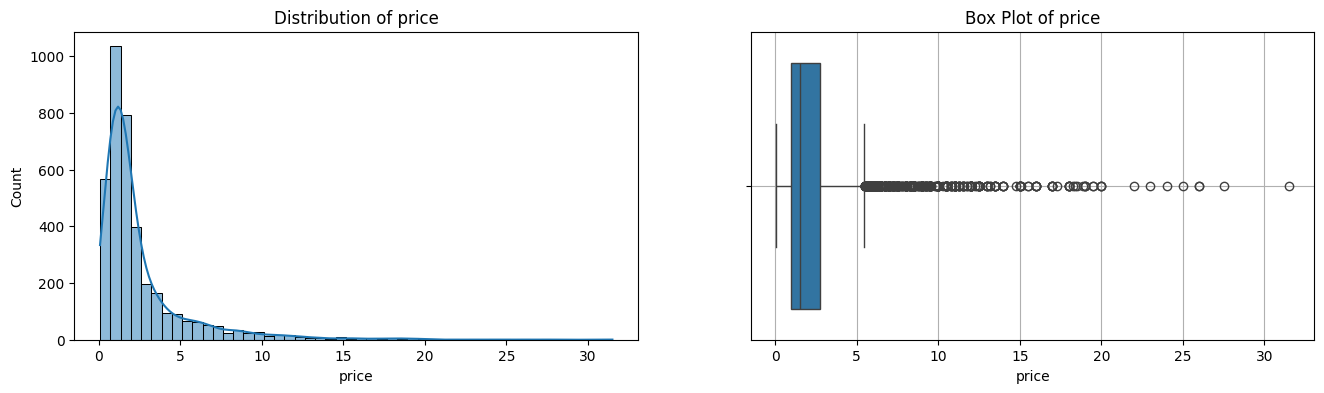

In [53]:
data_distribution_checker('price')

It shows that data in 'price' column is rightly skewed. Thus visualizing the presence of outliers through box plot

In [21]:
# creating function for outlier detection
def outlier_detection_IQR(col):
    """
    This function will return 4 items.
    input: name of the column
    output: return a tuple having values:
            1st value -> lower_limit
            2nd -> upper_limit
            3rd -> number of outliers
            4rd -> the outlier dataset
    """
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    outlier_df = df[(df[col]>upper_limit) | (df[col]<lower_limit)]

    return lower_limit, upper_limit, outlier_df.shape[0], outlier_df

In [22]:
outlier_detection_IQR('price')

(np.float64(-1.775),
 np.float64(5.465),
 435,
      property_type             society     sector  price    area  \
 26            flat      m3m golfestate  sector 65   5.50  3243.0   
 31           house      uppal southend  sector 49   6.75   232.0   
 47            flat       pioneer araya  sector 62   9.95  4739.0   
 48           house  vipul tatvam villa  sector 48   6.40  2592.0   
 66            flat  ambience creacions  sector 22   6.16  3000.0   
 ...            ...                 ...        ...    ...     ...   
 3786         house         independent  sector 50   7.00  2160.0   
 3788          flat     dlf the belaire  sector 54  10.00  4072.0   
 3795         house         independent  sector 28  10.50  3240.0   
 3800         house    dlf city phase 1  sector 26   5.50  1800.0   
 3809          flat     beverley park 1  sector 43   8.44  5200.0   
 
       price_per_sqft                                       areaWithType  \
 26           16959.0  Super Built up area 3243

In [23]:
# checking the outliers in price feature
price_outlier_df = outlier_detection_IQR('price')[3]

In [24]:
price_outlier_df.sort_values(by='price', ascending=False).head(20)

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
90,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,9000.0,35000.0,Plot area 1000(836.13 sq.m.),7,9,3+,...,NaN,9000.0,NaN,1,1,1,1,0,0,74
1089,house,independent,sector 43,27.50,11286.0,24366.0,Plot area 1254(1048.5 sq.m.),6,7,3+,...,NaN,11286.0,NaN,1,1,0,1,1,1,42
1687,house,dlf city plots,sector 26,26.00,4545.0,57206.0,Plot area 505(422.24 sq.m.),6,7,3+,...,NaN,4545.0,NaN,1,1,0,1,1,1,138
501,house,independent,sector 26,26.00,3150.0,82540.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,...,NaN,400.0,350.0,1,1,1,1,0,0,72
3036,house,suncity township,sector 54,25.00,8036.0,31111.0,Plot area 1000(836.13 sq.m.),4,4,3+,...,NaN,1000.0,NaN,1,1,1,1,0,2,0
591,house,emaar the palm springs,sector 54,24.00,400.0,600000.0,Plot area 400(37.16 sq.m.),5,5,2,...,NaN,400.0,NaN,1,1,0,1,0,1,122
3403,house,independent,sector 26,23.00,9000.0,25556.0,Plot area 1000(836.13 sq.m.),4,4,3+,...,NaN,9000.0,NaN,1,1,1,1,0,1,145
2783,house,vipul tatvam villa,sector 48,22.00,8250.0,26667.0,Plot area 1000(836.13 sq.m.),5,6,3,...,NaN,1000.0,NaN,0,1,0,0,0,2,54
109,house,independent,sector 26,20.00,4500.0,44444.0,Plot area 500(418.06 sq.m.),5,7,3+,...,NaN,4500.0,NaN,0,1,0,1,0,0,97
2542,house,dlf city plots,sector 26,20.00,4518.0,44265.0,Plot area 502(419.74 sq.m.),16,20,3+,...,NaN,4518.0,NaN,1,1,1,1,0,1,153


On the basis of outlier detection of price column:
- There are total 435 outliers.
- There are some genuine outliers along with some data errors as well.

### **`price_per_sqft` column**

In [45]:
df['price_per_sqft'].value_counts()

price_per_sqft
10000.0    28
8000.0     19
12500.0    17
5000.0     17
7500.0     14
           ..
4166.0      1
6979.0      1
18126.0     1
14179.0     1
16428.0     1
Name: count, Length: 2650, dtype: int64

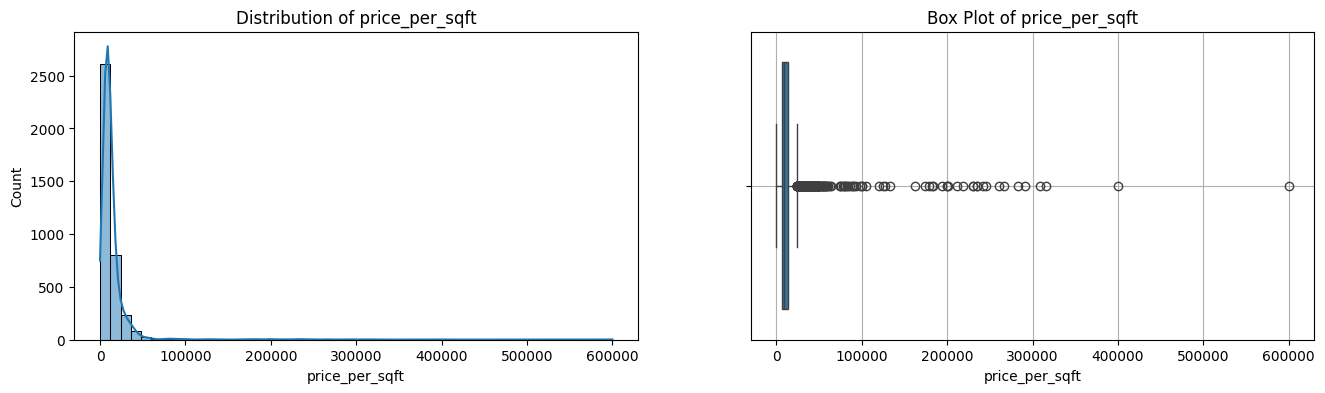

In [54]:
# visualizing the distribution of price_per_sqft
data_distribution_checker('price_per_sqft')

In [55]:
df['price_per_sqft'].skew()

np.float64(11.433721457265829)

From the above visualization:
- The data of  `price_per_sqft` are positivily rightly skewed.
- From the boxplot, we can say that it has high amount of outliers.

In [58]:
outlier_num = outlier_detection_IQR('price_per_sqft')[2]
print(f"The total number of outlier in price_per_sqft col. are {outlier_num}" )

The total number of outlier in price_per_sqft col. are 362


In [61]:
outlier_sqft = outlier_detection_IQR('price_per_sqft')[3].sort_values(by='price_per_sqft', ascending=False)
outlier_sqft

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
591,house,emaar the palm springs,sector 54,24.00,400.0,600000.0,Plot area 400(37.16 sq.m.),5,5,2,...,NaN,400.0,NaN,1,1,0,1,0,1,122
2754,house,dlf city plots phase 2,sector 25,10.00,250.0,400000.0,Plot area 250(23.23 sq.m.),12,12,3+,...,NaN,250.0,NaN,1,1,0,0,0,1,114
141,house,independent,sector 12,6.00,190.0,315789.0,Plot area 190(17.65 sq.m.)Carpet area: 1600 sq...,9,6,2,...,NaN,NaN,1600.0,0,0,0,0,0,2,0
3696,house,ansal,sector 43,1.85,60.0,308333.0,Plot area 60(5.57 sq.m.),8,8,3+,...,NaN,60.0,NaN,0,0,0,0,0,2,53
31,house,uppal southend,sector 49,6.75,232.0,290948.0,Plot area 232(21.55 sq.m.),12,12,3+,...,NaN,232.0,NaN,1,1,0,1,1,1,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,house,independent,sector 46,2.25,918.0,24510.0,Plot area 102(85.28 sq.m.)Built Up area: 90 sq...,4,3,3,...,NaN,90.0,85.0,1,0,0,0,0,1,35
2024,house,independent,sector 46,3.55,1449.0,24500.0,Plot area 161(134.62 sq.m.),5,4,3+,...,NaN,1449.0,NaN,0,1,0,0,0,1,73
1349,house,independent,sector 55,3.55,1449.0,24500.0,Plot area 161(134.62 sq.m.),4,4,3+,...,NaN,1449.0,NaN,0,0,0,0,0,1,27
2628,house,independent,sector 55,3.55,1449.0,24500.0,Plot area 161(134.62 sq.m.),4,4,3+,...,NaN,1449.0,NaN,0,0,0,0,0,1,27


The column `price_per_sqft` comes after dividing the price with area.
- The **area should be in square feet**. but there are some area that are in **square yards**. Thus multiple the area with 9 wherever the area is less than 1000

In [63]:
outlier_sqft['area'] = outlier_sqft['area'].apply(lambda x: x*9 if x<1000 else x)

In [64]:
# recalculating the values of price_per_sqft
outlier_sqft['price_per_sqft'] = round((outlier_sqft['price']*10000000)/outlier_sqft['area'])

In [65]:
outlier_sqft['price_per_sqft'].describe()

count      362.000000
mean     29413.055249
std      12329.472054
min       2723.000000
25%      25562.000000
50%      29788.500000
75%      35694.750000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [66]:
# updating the original dataset
df.update(outlier_sqft)

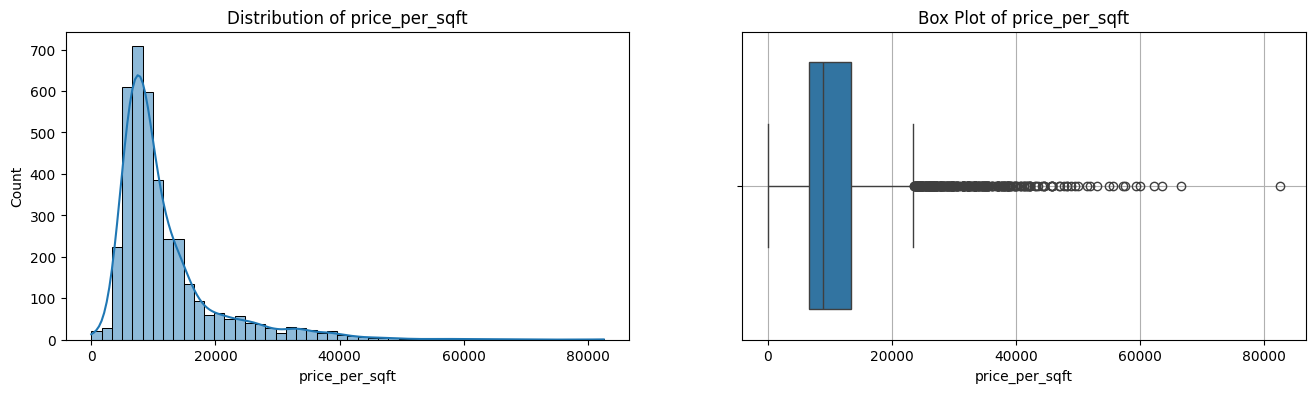

In [67]:
# checking the distribution
data_distribution_checker('price_per_sqft')

There are genuine outliers in price_per_sqft column where its value is greater than 50000. Thus removing them.

In [69]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
410,house,emaar mgf marbella,sector 66,18.00,3240.0,55556.0,Plot area 360(301.01 sq.m.),4,4,3+,...,NaN,3240.0,NaN,1,1,0,1,0,0,75
501,house,independent,sector 26,26.00,3150.0,82540.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,...,NaN,400.0,350.0,1,1,1,1,0,0,72
544,house,malibu towne,sector 47,8.50,1600.0,53125.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,...,NaN,1600.0,NaN,0,0,0,0,0,1,99
591,house,emaar the palm springs,sector 54,24.00,3600.0,66667.0,Plot area 400(37.16 sq.m.),5,5,2,...,NaN,400.0,NaN,1,1,0,1,0,1,122
1399,house,independent,sector 25,16.00,2700.0,59259.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16,16,3+,...,NaN,325.0,300.0,1,1,1,1,0,0,72
1641,house,project housing board colony,sector 31,8.00,1260.0,63492.0,Built Up area: 140 (117.06 sq.m.),2,1,NaN,...,NaN,140.0,NaN,0,0,0,0,0,2,0
1687,house,dlf city plots,sector 26,26.00,4545.0,57206.0,Plot area 505(422.24 sq.m.),6,7,3+,...,NaN,4545.0,NaN,1,1,0,1,1,1,138
2068,house,emaar the palm springs,sector 54,14.00,2250.0,62222.0,Plot area 250(209.03 sq.m.),4,5,3+,...,NaN,2250.0,NaN,1,1,0,0,0,1,160
2256,house,unitech escape,sector 50,10.80,1800.0,60000.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4,4,3,...,NaN,250.0,200.0,1,1,1,1,0,1,103
2344,house,nul,sector 28,12.50,2430.0,51440.0,Plot area 270(225.75 sq.m.),16,17,3+,...,NaN,2430.0,NaN,1,1,0,1,1,0,137


In [70]:
# removing these 13 rows having price_per_sqft > 50000
df = df[df['price_per_sqft'] <= 50000]

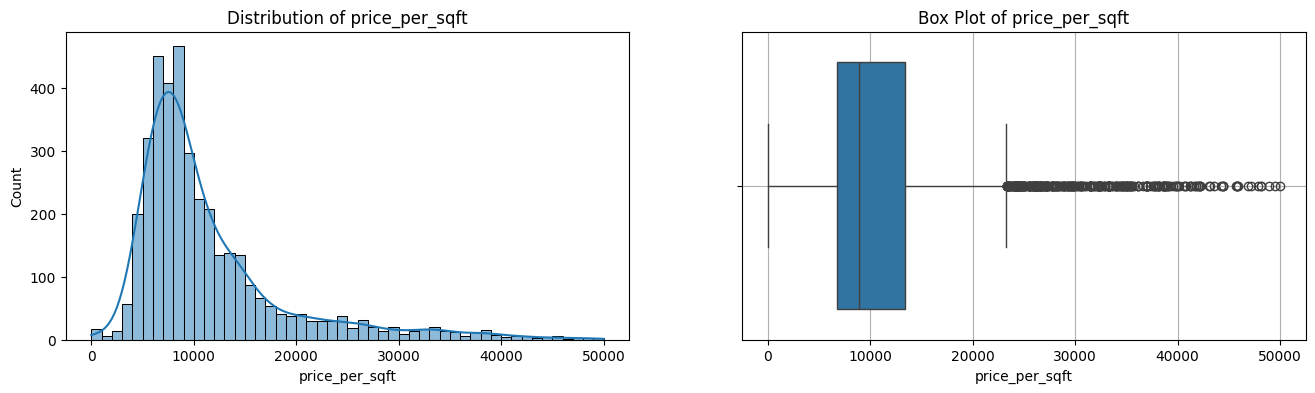

In [71]:
data_distribution_checker('price_per_sqft')

After removing a lot of outliers from the **price_per_sqft**, the spread of distribution increases.

### **`area` column**

In [72]:
df['area'].value_counts()

area
1650.0     55
1350.0     51
1800.0     49
3240.0     46
1950.0     44
           ..
2072.0      1
2079.0      1
2112.0      1
12645.0     1
2862.0      1
Name: count, Length: 1294, dtype: int64

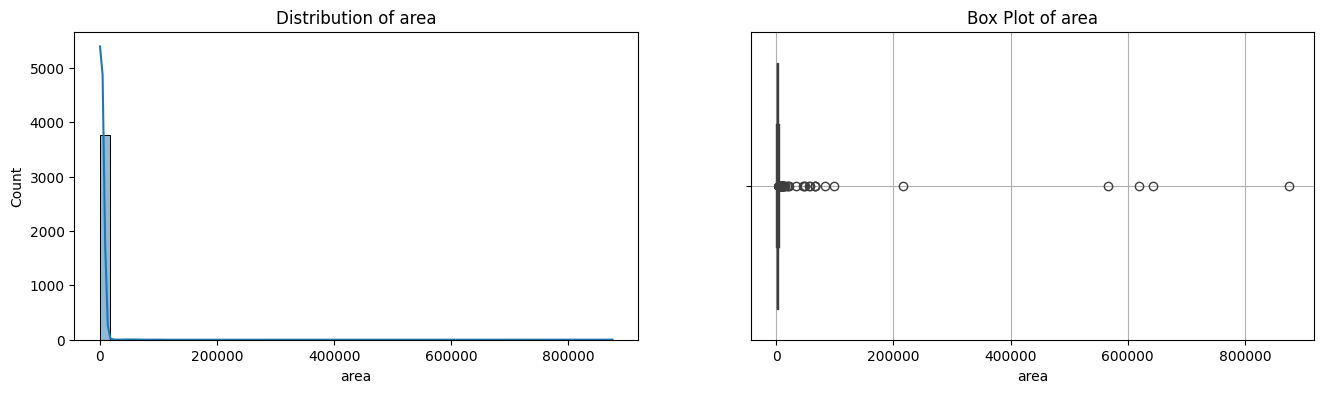

In [86]:
# visualization
data_distribution_checker('area')

In [87]:
df['area'].describe()

count      3784.000000
mean       2905.326374
std       22786.077048
min         145.000000
25%        1259.000000
50%        1745.000000
75%        2341.500000
max      875000.000000
Name: area, dtype: float64

In [88]:
# checking properties having area > 100000
df[df['area']>100000]

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 50,5.00,215517.0,232.0,Plot area 2(1011.71 sq.m.),6,5,3+,...,NaN,2.0,NaN,1,1,0,1,1,1,0
1022,flat,ramsons kshitij,sector 95,0.31,620000.0,5.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,...,NaN,NaN,607936.0,1,0,0,0,1,2,65
1830,flat,hcbs sports ville,sohna road,0.35,875000.0,4.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,...,NaN,737147.0,NaN,0,0,0,0,0,0,44
2061,flat,signature global solera 2,sector 107,0.51,566667.0,9.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,...,NaN,NaN,514396.0,0,0,0,0,0,2,44
3663,flat,signature the roselia,sector 95,0.45,642857.0,7.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,...,NaN,NaN,569243.0,0,0,0,0,0,2,76


Removing these 5 rows as the volumn of area is not justifying the area.

In [89]:
df = df[df['area'] < 100000]

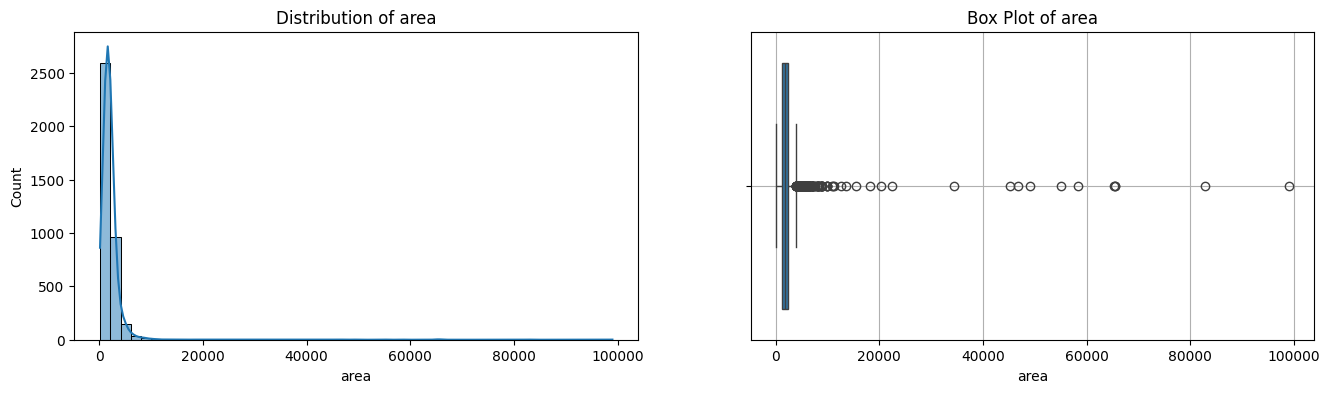

In [90]:
data_distribution_checker('area')

In [92]:
# checking area > 100000
df[df['area']>10000].sort_values('area',ascending=False)

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
127,house,independent,sector 26,18.40,98978.0,1859.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,...,NaN,NaN,11000.00,0,1,1,1,0,1,60
3574,house,ganpati heights apartment,sector 13,1.25,82781.0,151.0,Plot area 115(7692.86 sq.m.),10,6,2,...,NaN,115.0,NaN,0,0,0,0,1,2,7
2770,flat,rof ananda,sector 95,0.38,65517.0,58.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,...,NaN,NaN,64529.00,1,0,0,0,0,2,15
3681,flat,rof ananda,sector 95,0.38,65517.0,58.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,...,NaN,NaN,64412.00,0,0,0,0,0,2,51
3727,house,dlf city plot phase 4,sector 28,13.00,65261.0,1992.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,...,NaN,NaN,7250.00,0,0,0,0,0,2,0
1188,flat,pyramid elite,sector 86,0.46,58228.0,79.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.00,0,0,0,0,0,2,15
2636,flat,rof ananda,sector 95,0.33,55000.0,60.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,...,NaN,NaN,54917.00,0,0,0,0,0,2,37
1860,flat,signature the serenas,sohna road,0.28,49123.0,57.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,...,NaN,NaN,48811.00,1,0,0,0,0,2,37
214,house,independent,sector 25,7.30,46795.0,1560.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,...,NaN,5800.0,5200.00,0,1,1,0,0,1,109
1550,flat,ramsons kshitij,sector 95,0.24,45283.0,53.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,...,NaN,NaN,45966.00,0,0,0,0,1,2,33


There are 9 rows where area is not matching with the property's price and amount of furnisher. Thus removing those rows.

In [93]:
df.drop(index=[127,2770,3681,1188,2636,1860,2306,1550,2761], inplace=True)

In [96]:
df[df['area']>10000].sort_values('area',ascending=False)

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3574,house,ganpati heights apartment,sector 13,1.25,82781.0,151.0,Plot area 115(7692.86 sq.m.),10,6,2,...,NaN,115.0,NaN,0,0,0,0,1,2,7
3727,house,dlf city plot phase 4,sector 28,13.00,65261.0,1992.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,...,NaN,NaN,7250.00,0,0,0,0,0,2,0
214,house,independent,sector 25,7.30,46795.0,1560.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,...,NaN,5800.0,5200.00,0,1,1,0,0,1,109
581,house,independent,sector 57,6.25,22498.0,2778.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9,9,3+,...,NaN,2660.0,2500.00,0,1,0,0,0,1,61
2271,house,independent,sector 43,5.50,20250.0,2716.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8,7,3+,...,NaN,2850.0,2250.00,1,1,0,1,1,1,123
3034,flat,godrej air,sector 85,2.50,18129.0,1379.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,...,NaN,NaN,18122.00,1,0,0,1,1,1,44
1652,house,unitech aspen greens,sector 50,6.95,15479.0,4490.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3,3,1,...,NaN,2160.0,1720.00,0,1,0,0,0,2,160
3711,flat,godrej icon,sector 88a,1.75,12645.0,1384.0,Carpet area: 1175.11,3,3,3+,...,NaN,NaN,1175.11,0,0,0,0,0,2,55
1089,house,independent,sector 43,27.50,11286.0,24366.0,Plot area 1254(1048.5 sq.m.),6,7,3+,...,NaN,11286.0,NaN,1,1,0,1,1,1,42
560,flat,m3m golfestate,sector 65,13.20,11000.0,12000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,...,NaN,NaN,11000.00,0,1,0,0,0,2,60


In [97]:
# updating the areas
df.loc[3574, 'area'] = 115*9
df.loc[3727,'area'] = 7250
df.loc[214,'area'] = 5800
df.loc[581,'area'] = 2660
df.loc[2271,'area'] = 2850
df.loc[3034,'area'] = 1812
df.loc[1652,'area'] = 2160
df.loc[3711,'area'] = 1175


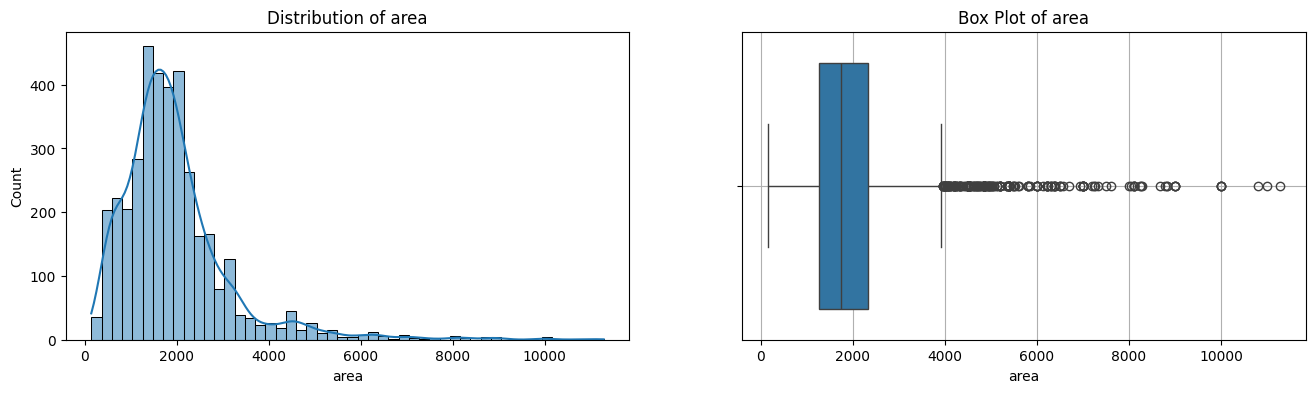

In [98]:
data_distribution_checker('area')

In [99]:
df['area'].describe()

count     3769.000000
mean      1943.970815
std       1211.990250
min        145.000000
25%       1252.000000
50%       1743.000000
75%       2321.000000
max      11286.000000
Name: area, dtype: float64

### **`bedroom` column**

In [100]:
df['bedRoom'].value_counts()

bedRoom
3     1543
2      981
4      679
5      202
1      128
6       72
9       40
8       30
7       28
12      27
10      20
16       7
13       4
18       2
19       2
14       1
21       1
11       1
20       1
Name: count, dtype: int64

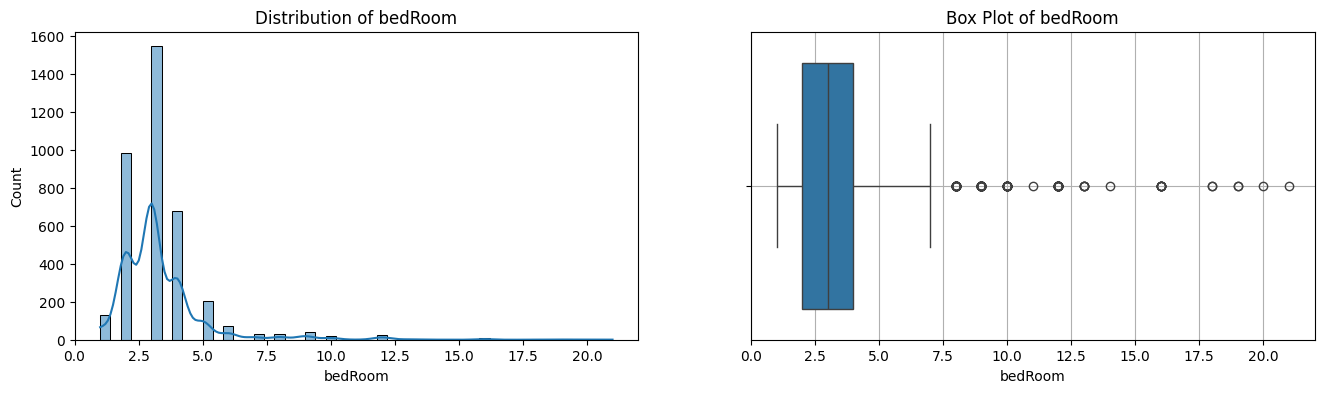

In [101]:
data_distribution_checker('bedRoom')

In [102]:
df['bedRoom'].describe()

count    3769.000000
mean        3.316795
std         1.813911
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [104]:
df[df['bedRoom']>10].sort_values('bedRoom', ascending=False)

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1042,house,independent,sector 54,5.00,1161.0,43066.0,Plot area 129(107.86 sq.m.),21,21,3+,...,NaN,1161.0,NaN,0,1,0,0,0,0,49
3199,house,independent,sector 43,4.50,1152.0,39062.0,Plot area 128(107.02 sq.m.),20,20,3+,...,NaN,1152.0,NaN,0,1,0,0,0,0,22
2948,house,independent,sector 17a,3.93,1623.0,24214.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,...,NaN,1622.0,NaN,1,1,1,1,0,2,74
3473,house,independent,sector 17a,3.87,7500.0,5160.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,...,NaN,7500.0,NaN,1,0,1,0,0,2,68
2923,house,independent,sector 54,5.50,1440.0,38194.0,Plot area 160(133.78 sq.m.),18,18,3+,...,NaN,1440.0,NaN,0,1,0,0,0,0,70
278,house,private house,sector 55,7.05,1503.0,46906.0,Plot area 167(139.63 sq.m.),18,18,3+,...,NaN,1503.0,NaN,0,0,0,0,1,0,57
2542,house,dlf city plots,sector 26,20.00,4518.0,44267.0,Plot area 502(419.74 sq.m.),16,20,3+,...,NaN,4518.0,NaN,1,1,1,1,0,1,153
2331,house,luxury dlf city floors,sector 26,20.00,4091.0,48888.0,Plot area 500(418.06 sq.m.),16,16,3+,...,NaN,500.0,NaN,0,1,0,0,0,1,31
2383,house,independent,sector 56,12.39,2700.0,45889.0,Plot area 300(250.84 sq.m.),16,18,3+,...,NaN,2700.0,NaN,0,1,0,1,0,1,49
1732,house,independent,sector 40,12.00,3078.0,38986.0,Plot area 342(285.96 sq.m.),16,16,3+,...,NaN,3078.0,NaN,1,1,1,1,0,1,0


In [105]:
# removing properties having bedroom > 10
df = df[df['bedRoom']<=10]

In [106]:
df.shape

(3723, 23)

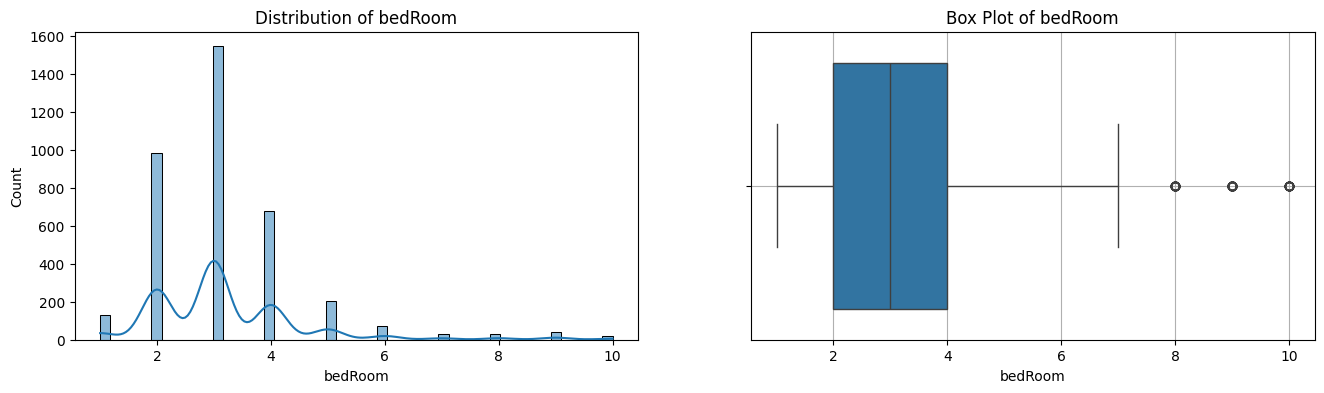

In [107]:
data_distribution_checker('bedRoom')

### **`bathRoom` column**

In [108]:
df['bathroom'].value_counts()

bathroom
3     1109
2     1093
4      838
5      292
1      156
6      122
9       39
7       38
8       24
10       9
11       2
12       1
Name: count, dtype: int64

In [109]:
df['bathroom'].describe()

count    3723.000000
mean        3.262423
std         1.450103
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        12.000000
Name: bathroom, dtype: float64

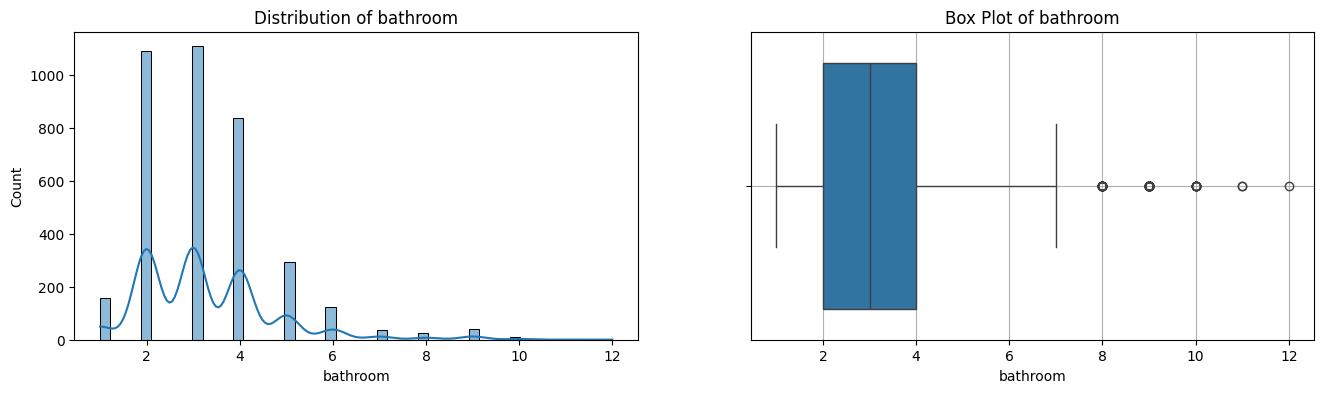

In [111]:
data_distribution_checker('bathroom')

In [110]:
df[df['bathroom']>10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1741,house,adani brahma samsara,sector 60,18.02,6390.0,28200.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,...,NaN,6390.0,NaN,0,1,0,0,0,1,146
820,house,independent,sector 24,11.00,3806.0,28902.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,...,NaN,5000.0,NaN,1,1,0,1,1,1,39
1432,house,independent,sector 39,7.00,7000.0,10000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,...,NaN,7000.0,NaN,0,0,0,1,0,0,38


Not removing the properties having bathroom greater than 10 as comparing with the amount of bedroom present in the property these number of bathrooms are true.

### **`super build up area` column** 

In [ ]:
df['super_built_up_area']

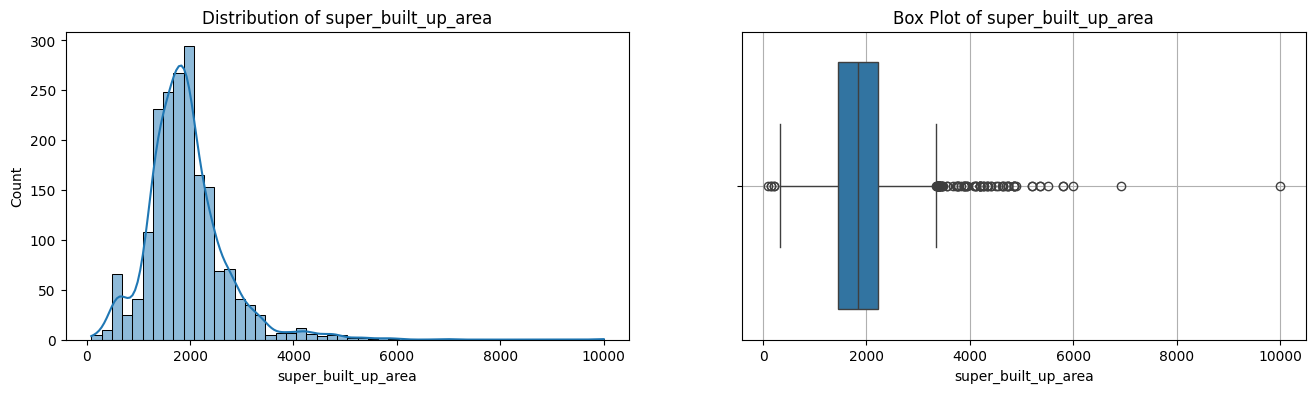

In [112]:
data_distribution_checker('super_built_up_area')

In [113]:
df['super_built_up_area'].describe()

count     1915.000000
mean      1921.658251
std        767.160169
min         89.000000
25%       1457.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [114]:
df[df['super_built_up_area']>6000]

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
940,flat,bestech park view grand spa,sector 81,4.7,6926.0,6786.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,...,6926.0,NaN,NaN,0,1,0,0,0,1,140
1755,flat,krrish provence estate,gwal pahari,7.5,10000.0,7500.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,...,10000.0,NaN,NaN,0,1,0,1,1,2,49


### **`build up area` column**

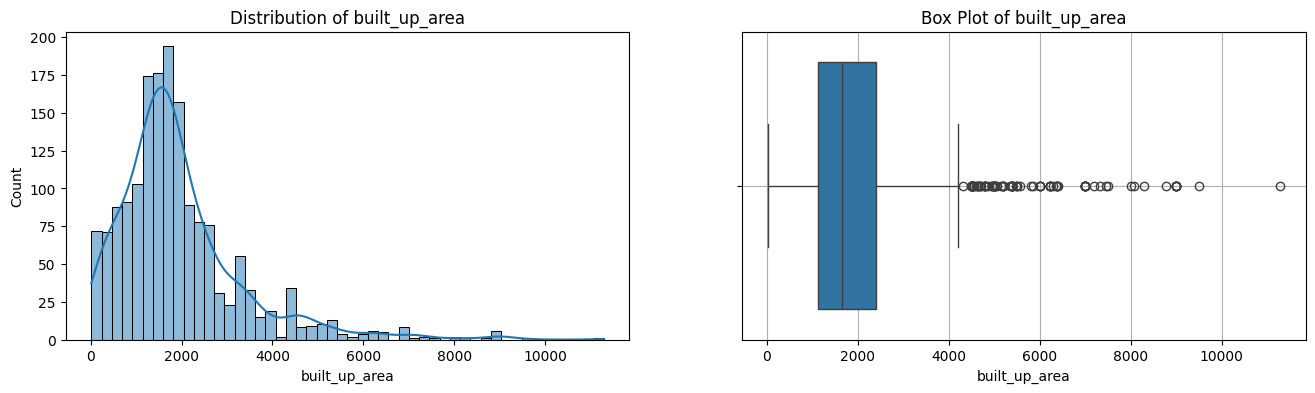

In [115]:
data_distribution_checker('built_up_area')

In [116]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1089,house,independent,sector 43,27.5,11286.0,24366.0,Plot area 1254(1048.5 sq.m.),6,7,3+,...,NaN,11286.0,NaN,1,1,0,1,1,1,42


### **`carpet area` column**

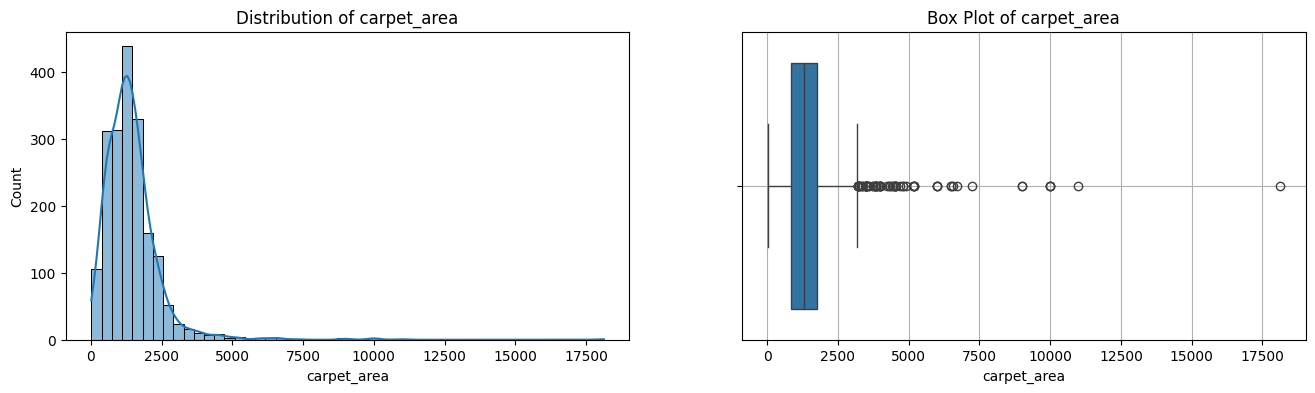

In [117]:
data_distribution_checker('carpet_area')

In [118]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
560,flat,m3m golfestate,sector 65,13.2,11000.0,12000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,...,NaN,NaN,11000.0,0,1,0,0,0,2,60
3034,flat,godrej air,sector 85,2.5,1812.0,1379.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,...,NaN,NaN,18122.0,1,0,0,1,1,1,44


In [119]:
df.loc[3034, 'carpet_area'] = 1812

In [120]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
560,flat,m3m golfestate,sector 65,13.2,11000.0,12000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,...,NaN,NaN,11000.0,0,1,0,0,0,2,60


In [121]:
df.head()

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1,flat,dlf regal gardens,sector 90,1.29,1430.0,9020.0,Super Built up area 1702(158.12 sq.m.)Built Up...,3,3,3,...,1702.0,1540.0,1430.0,1,0,0,0,0,2,174
2,flat,ireo the grand arch,sector 58,2.20,1375.0,16000.0,Carpet area: 1375 (127.74 sq.m.),2,2,1,...,NaN,NaN,1375.0,0,0,0,1,0,1,49
3,flat,ireo victory valley,sector 67,2.95,2436.0,12110.0,Super Built up area 2436(226.31 sq.m.)Built Up...,3,3,3+,...,2436.0,2236.0,2036.0,0,1,0,1,0,1,165
4,flat,puri emerald bay,sector 104,2.23,2250.0,9911.0,Super Built up area 2450(227.61 sq.m.)Carpet a...,3,4,3+,...,2450.0,NaN,2250.0,0,1,0,0,0,1,159
5,flat,raheja vedaanta,sector 108,0.70,1548.0,4522.0,Built Up area: 1548 (143.81 sq.m.)Carpet area:...,2,2,3,...,NaN,1548.0,1200.0,0,0,0,0,0,2,0


### **`luxury_score` column**

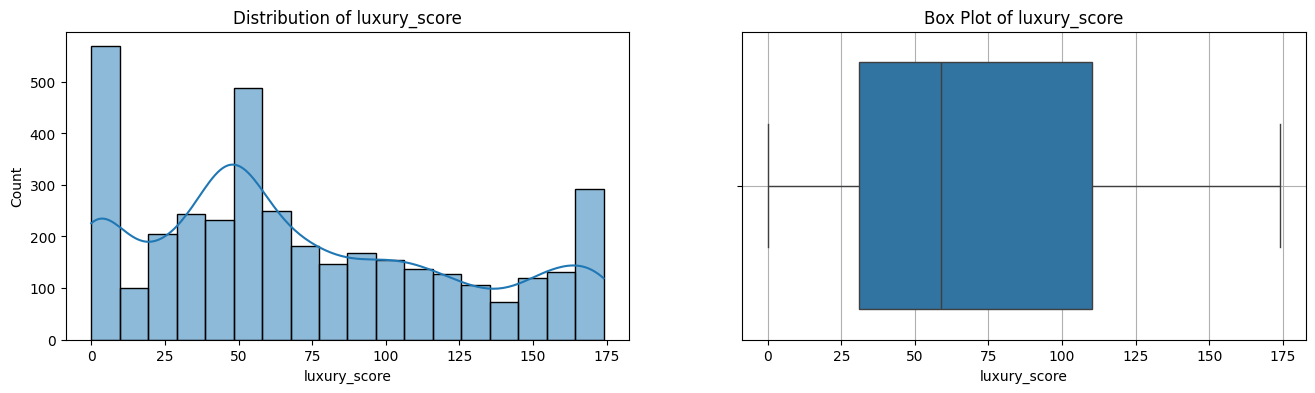

In [127]:
data_distribution_checker('luxury_score', 'auto')

In [128]:
df.shape

(3723, 23)

In [129]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

C:\Users\aasth\AppData\Local\Temp\ipykernel_24436\3958460563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft'] = round((df['price']*10000000)/df['area'])


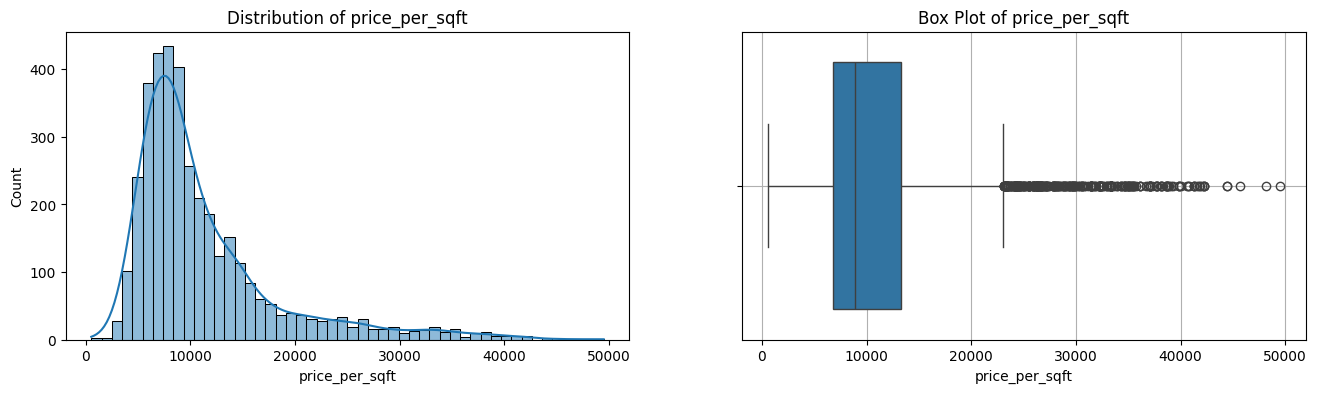

In [130]:
data_distribution_checker('price_per_sqft')

In [131]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
109,house,independent,sector 26,20.0,4500.0,44444.0,Plot area 500(418.06 sq.m.),5,7,3+,...,NaN,4500.0,NaN,0,1,0,1,0,0,97
255,house,independent,sector 28,12.0,2844.0,42194.0,Plot area 316(264.22 sq.m.),4,5,3+,...,NaN,2844.0,NaN,0,1,1,1,0,1,60
292,house,independent,sector 26,19.0,4500.0,42222.0,Plot area 500(418.06 sq.m.),6,8,3+,...,NaN,4500.0,NaN,1,1,1,1,0,1,103
459,house,independent,sector 25,13.0,2844.0,45710.0,Plot area 316(264.22 sq.m.),6,8,3+,...,NaN,2844.0,NaN,1,1,1,1,0,0,0
867,house,dlf city plots,sector 26,19.0,4518.0,42054.0,Plot area 502(419.74 sq.m.),6,6,3,...,NaN,4518.0,NaN,1,1,0,0,0,1,121
1387,house,sushant lok 1 builder floors,sector 43,13.0,2700.0,48148.0,Plot area 300(250.84 sq.m.),3,3,3+,...,NaN,2700.0,NaN,0,0,0,1,0,1,7
1604,house,independent,sector 43,9.5,2250.0,42222.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5,5,3+,...,NaN,300.0,250.0,0,1,0,1,0,1,88
2296,house,independent,sector 105,9.9,2000.0,49500.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2,2,2,...,NaN,2000.0,1800.0,0,0,0,0,0,2,0
3154,house,independent,sector 55,5.0,1125.0,44444.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,...,NaN,115.0,100.0,0,0,0,0,1,1,44


In [136]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

np.float64(257.0)

In [139]:
df[(df['area']/df['bedRoom'])< 257].sample(5)

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3173,flat,pivotal devaan,sector 84,0.35,483.0,7246.0,Carpet area: 483 (44.87 sq.m.),2,2,2,...,NaN,NaN,483.0,0,0,0,0,0,2,37
1012,house,independent,sector 105,0.60,450.0,13333.0,Built Up area: 450 (41.81 sq.m.),3,3,NaN,...,NaN,450.0,NaN,0,0,0,0,0,2,0
1194,flat,central park flower valley,sector 33,1.40,650.0,21538.0,Super Built up area 650(60.39 sq.m.),3,3,3,...,650.0,NaN,NaN,0,0,0,0,0,2,54
2429,house,independent,sector 17,0.32,565.0,5664.0,Built Up area: 565 (52.49 sq.m.),5,1,NaN,...,NaN,565.0,NaN,0,0,0,0,0,2,0
3741,house,independent,sector 4,0.67,684.0,9795.0,Plot area 76(7.06 sq.m.),3,3,2,...,NaN,76.0,NaN,0,0,0,0,1,2,7


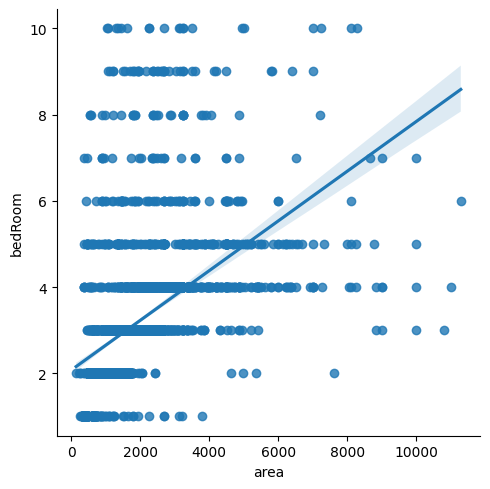

In [140]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [141]:
df['area_room_ratio'] = df['area']/df['bedRoom']

C:\Users\aasth\AppData\Local\Temp\ipykernel_24436\465686754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_room_ratio'] = df['area']/df['bedRoom']


In [144]:
(df[df['area_room_ratio'] < 257])['bedRoom'].value_counts()

bedRoom
2     55
3     41
5     19
6     18
9     15
4     13
8      9
10     8
7      6
1      1
Name: count, dtype: int64

In [143]:
df = df[df['area_room_ratio'] > 100]

In [145]:
outlier_df = df[(df['area_room_ratio']<257) & (df['bedRoom'] > 3)]

In [148]:
outlier_df['bedRoom'] = round(outlier_df['bedRoom']/outlier_df['floorNum'])

C:\Users\aasth\AppData\Local\Temp\ipykernel_24436\3308225235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_df['bedRoom'] = round(outlier_df['bedRoom']/outlier_df['floorNum'])


In [149]:
outlier_df

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
15,house,"bhim nagar, sector 6",sector 6,0.85,603.0,14096.0,Plot area 67(6.22 sq.m.),5.0,2,2,...,67.0,NaN,0,0,0,1,0,2,29,120.60
32,house,uppal southend,sector 49,3.75,1467.0,25562.0,Plot area 163(136.29 sq.m.),2.0,6,3,...,1467.0,NaN,0,0,0,0,1,2,49,244.50
69,house,independent,sector 4,1.10,990.0,11111.0,Built Up area: 990 (91.97 sq.m.),3.0,4,1,...,990.0,NaN,0,0,0,0,0,2,0,165.00
141,house,independent,sector 12,6.00,1710.0,35088.0,Plot area 190(17.65 sq.m.)Carpet area: 1600 sq...,4.0,6,2,...,NaN,1600.0,0,0,0,0,0,2,0,190.00
148,house,independent,sector 12,2.50,1800.0,13889.0,Plot area 1800(167.23 sq.m.),9.0,5,2,...,1800.0,NaN,0,0,0,1,0,2,8,200.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,house,dlf city plots phase 2,sector 25,6.50,1935.0,33592.0,Plot area 215(179.77 sq.m.),3.0,9,3+,...,1935.0,NaN,1,1,1,1,0,1,142,215.00
3574,house,ganpati heights apartment,sector 13,1.25,1035.0,12077.0,Plot area 115(7692.86 sq.m.),3.0,6,2,...,115.0,NaN,0,0,0,0,1,2,7,103.50
3614,house,housing board colony,sector 28,3.50,1350.0,25926.0,Plot area 150(125.42 sq.m.),2.0,6,3,...,1350.0,NaN,0,0,0,0,0,2,0,225.00
3688,house,independent,sector 12,0.90,675.0,13333.0,Built Up area: 675 (62.71 sq.m.),2.0,4,NaN,...,675.0,NaN,0,0,0,0,0,2,0,168.75


In [150]:
df.update(outlier_df)

In [151]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [152]:
df[(df['area_room_ratio'] < 257) & (df['bedRoom'] > 4)]

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
15,house,"bhim nagar, sector 6",sector 6,0.85,603.0,14096.0,Plot area 67(6.22 sq.m.),5,2,2,...,67.0,NaN,0,0,0,1,0,2,29,120.600000
148,house,independent,sector 12,2.50,1800.0,13889.0,Plot area 1800(167.23 sq.m.),9,5,2,...,1800.0,NaN,0,0,0,1,0,2,8,200.000000
305,house,independent,manesar,0.80,1200.0,6667.0,Plot area 1200(111.48 sq.m.),8,8,2,...,1200.0,NaN,0,0,0,0,0,2,0,150.000000
424,house,independent,sector 3 phase 2,1.10,1100.0,10000.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5,4,2,...,1100.0,900.0,0,0,0,0,0,2,0,220.000000
512,house,independent,sector 12,0.65,1000.0,6500.0,Carpet area: 1000 (92.9 sq.m.),6,2,3,...,NaN,1000.0,0,0,0,0,0,2,0,166.666667
1470,house,independent,sector 3 phase 2,0.85,900.0,9444.0,Carpet area: 900 (83.61 sq.m.),5,3,3,...,NaN,900.0,0,0,0,0,0,2,0,180.000000
1602,house,independent,sector 7,1.16,990.0,11717.0,Carpet area: 110 (91.97 sq.m.),5,4,2,...,NaN,110.0,0,0,0,0,0,2,0,198.000000
1646,house,independent,sector 2,0.98,1080.0,9074.0,Carpet area: 120 (100.34 sq.m.),9,4,3,...,NaN,120.0,0,0,0,0,0,2,0,120.000000
1785,house,independent,manesar,1.10,1782.0,6173.0,Plot area 1782(165.55 sq.m.),8,8,NaN,...,1782.0,NaN,0,0,0,0,0,2,0,222.750000
2429,house,independent,sector 17,0.32,565.0,5664.0,Built Up area: 565 (52.49 sq.m.),5,1,NaN,...,565.0,NaN,0,0,0,0,0,2,0,113.000000


In [153]:
# removing these datapoints
df = df[~((df['area_room_ratio']<257) & (df['bedRoom']>4))]

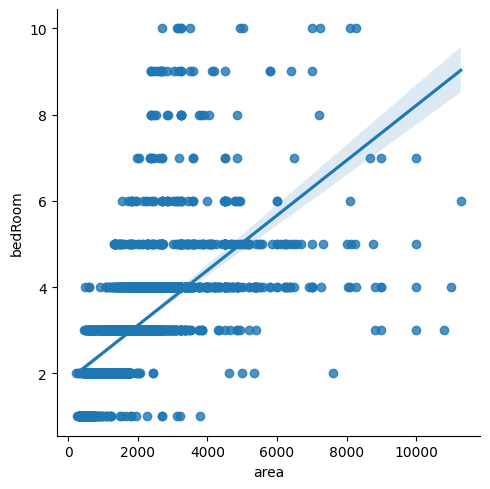

In [154]:
sns.lmplot(data=df, x='area', y='bedRoom')

In [155]:
df.shape

(3690, 24)

In [156]:
df.head()

,property_type,society,sector,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,dlf regal gardens,sector 90,1.29,1430.0,9021.0,Super Built up area 1702(158.12 sq.m.)Built Up...,3,3,3,...,1540.0,1430.0,1,0,0,0,0,2,174,476.666667
2,flat,ireo the grand arch,sector 58,2.20,1375.0,16000.0,Carpet area: 1375 (127.74 sq.m.),2,2,1,...,NaN,1375.0,0,0,0,1,0,1,49,687.500000
3,flat,ireo victory valley,sector 67,2.95,2436.0,12110.0,Super Built up area 2436(226.31 sq.m.)Built Up...,3,3,3+,...,2236.0,2036.0,0,1,0,1,0,1,165,812.000000
4,flat,puri emerald bay,sector 104,2.23,2250.0,9911.0,Super Built up area 2450(227.61 sq.m.)Carpet a...,3,4,3+,...,NaN,2250.0,0,1,0,0,0,1,159,750.000000
5,flat,raheja vedaanta,sector 108,0.70,1548.0,4522.0,Built Up area: 1548 (143.81 sq.m.)Carpet area:...,2,2,3,...,1548.0,1200.0,0,0,0,0,0,2,0,774.000000


In [157]:
df.to_csv('data/gurgaon_properties_outlier_treatment.csv', index=False)